In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prvni zakladni přiklad NN

obrazky čisel - + jejich labely ... naučit se rozeznávat čísla

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [7]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))

In [9]:
network.compile(optimizer = 'adam',   # rmsprop
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [10]:
train_images = train_images.reshape((60000, 28 * 28 ))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [18]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [20]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.9247
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1091 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0511 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0370 - accuracy: 0.9897


In [21]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)
print('test_loss: ', test_loss)

313/313 [==============================] - 0s 499us/step - loss: 0.0679 - accuracy: 0.9784
test_acc:  0.9783999919891357
test_loss:  0.06794916093349457


# Reprezentace dat pro NN

In [22]:
x = np.array(12)
print(x)
print(x.ndim)

12
0


In [25]:
x = np.array([12, 2 ,3 , 15, 122])
print(x)
print(x.ndim)

[ 12   2   3  15 122]
1


In [26]:
x = np.array([[2, 2 ,3 , 15, 122],
              [2, 2 ,3 , 15, 122],
              [2, 2 ,3 , 15, 122]])
print(x)
print(x.ndim)

[[  2   2   3  15 122]
 [  2   2   3  15 122]
 [  2   2   3  15 122]]
2


In [27]:
x = np.array([[[2, 2 ,3 , 15, 122],
              [2, 2 ,3 , 15, 122],
              [2, 2 ,3 , 15, 122]],
             [[2, 2 ,3 , 15, 122],
              [2, 2 ,3 , 15, 122],
              [2, 2 ,3 , 15, 122]],
             [[2, 2 ,3 , 15, 122],
              [2, 2 ,3 , 15, 122],
              [2, 2 ,3 , 15, 122]]])
print(x)
print(x.ndim)

[[[  2   2   3  15 122]
  [  2   2   3  15 122]
  [  2   2   3  15 122]]

 [[  2   2   3  15 122]
  [  2   2   3  15 122]
  [  2   2   3  15 122]]

 [[  2   2   3  15 122]
  [  2   2   3  15 122]
  [  2   2   3  15 122]]]
3


In [30]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


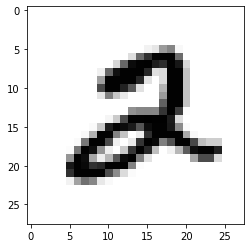

In [32]:
digit = train_images[5]

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [33]:
my_slice = train_images[10:100]
print(my_slice.shape)
my_slice = train_images[10:100,:,:]
print(my_slice.shape)
my_slice = train_images[10:100,0:28,0:28]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)


In [34]:
my_slice = train_images[:,14:,14:]
print(my_slice.shape)
my_slice = train_images[:,7:-7,7:-7]
print(my_slice.shape)

(60000, 14, 14)
(60000, 14, 14)


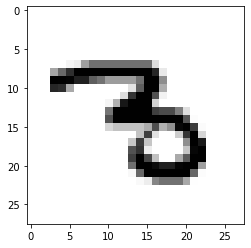

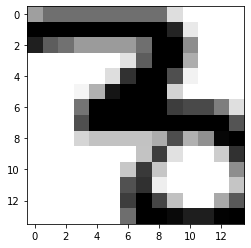

In [37]:
plt.imshow(train_images[30], cmap = plt.cm.binary)
plt.show()
plt.imshow(my_slice[30], cmap = plt.cm.binary)
plt.show()

In [43]:
def naive_relu(x):
    assert len(x.shape) == 2, 'Fuck this shit!, "x" is no 2D vector, hell!'
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x

x = np.array([[ 1, 3, -2],
              [-4, 3, -2],
              [-3 ,3 ,-2]])
naive_relu(x)

array([[1, 3, 0],
       [0, 3, 0],
       [0, 3, 0]])

In [44]:
x = np.array([1,3,-2])
naive_relu(x)

AssertionError: Fuck this shit!, "x" is no 2D vector, hell!

# Zmena tvaru vektoru

In [50]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
print(x.shape)
print(x.reshape((6,1)))
print(x.reshape((6,1)).shape)
print(x.reshape((2,3)))
print(x.reshape((2,3)).shape)

(3, 2)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
(6, 1)
[[0. 1. 2.]
 [3. 4. 5.]]
(2, 3)


In [53]:
x = np.zeros((2,5))
x[1,1] = 3
print(x)
print(x.T)
print(x.reshape(5,2))

[[0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0.]]
[[0. 0.]
 [0. 3.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [3. 0.]
 [0. 0.]]


In [54]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape=(784,)))
model.add(layers.Dense(10, activation = 'softmax'))

# same model ... other way
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs = input_tensor, outputs = output_tensor) 

In [62]:
from tensorflow.keras import optimizers

model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.001),
              loss='mse',
              metrics = ['accuracy'])

# model.fit(input_tensor, target_tensor, batch_size = 128, epochs = 10)

In [1]:
!pip install tensorflow-gpu

^C


In [2]:
import time
from keras.datasets import mnist
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical

start = time.time()


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))

network.compile(optimizer = 'adam',   # rmsprop
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

train_images = train_images.reshape((60000, 28 * 28 ))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs = 5, batch_size = 128)


test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)
print('test_loss: ', test_loss)
print('time: ', round(time.time()-start,2),'s')

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2699 - accuracy: 0.9232
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1087 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0719 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0488 - accuracy: 0.9860
Epoch 5/5
313/313 [==============================] - 0s 520us/step - loss: 0.0664 - accuracy: 0.9790
test_acc:  0.9789999723434448
test_loss:  0.06636551767587662
time:  6.17 s


# Klasifikace typu ANO / NE

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [17]:
max([max(i) for i in test_data])

9999

In [12]:
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 1s 1us/step


In [13]:

reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])

In [21]:
decoced_rewiew = ' '.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])
decoced_rewiew                           

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [29]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results               

In [40]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [41]:
y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32')

In [85]:
from keras import models
from keras import layers

from tensorflow.keras import optimizers
from keras import metrics
from keras import losses

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

#model.compile(optimizer = 'adam',
#              loss = 'binary_crossentropy',
#              metrics = ['accuracy'])

#model.compile(optimizer = optimizers.Adam(learning_rate = 0.001),
#              loss = losses.binary_crossentropy,
#              metrics = [metrics.binary_accuracy])

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [86]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [87]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))
                    

Epoch 1/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5143 - acc: 0.7895 - val_loss: 0.3805 - val_acc: 0.8711
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3048 - acc: 0.9035 - val_loss: 0.3060 - val_acc: 0.8852
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2218 - acc: 0.9265 - val_loss: 0.2988 - val_acc: 0.8801
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1749 - acc: 0.9430 - val_loss: 0.2723 - val_acc: 0.8911
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1409 - acc: 0.9554 - val_loss: 0.3054 - val_acc: 0.8764
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1195 - acc: 0.9632 - val_loss: 0.2911 - val_acc: 0.8867
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1027 - acc: 0.9682 - val_loss: 0.3077 - val_acc: 0.8839
Epoch 8/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0826 - a

In [88]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

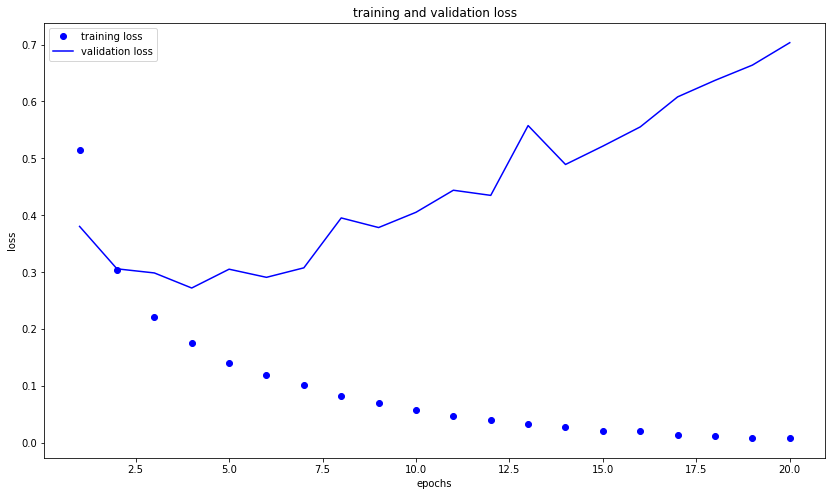

In [89]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.figure(figsize = [14,8])
plt.plot(epochs, loss_values, 'bo', label = 'training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'validation loss')
plt.title("training and validation loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#plt.clf

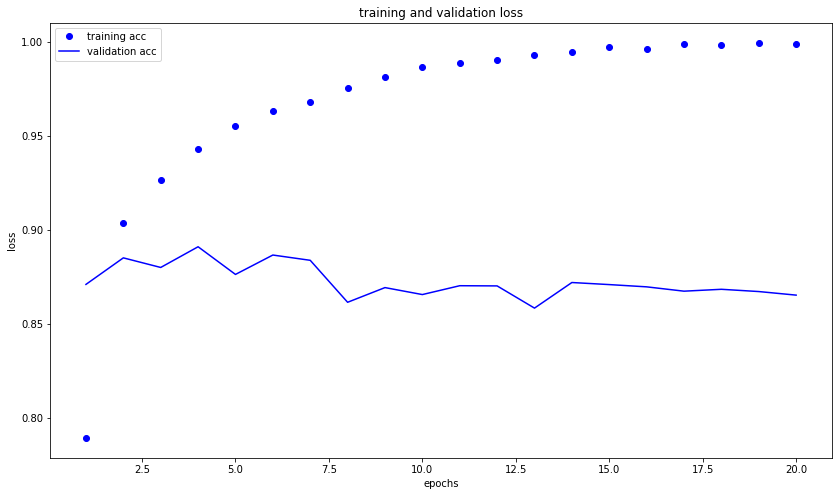

In [90]:
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']

epochs = range(1,len(loss_values)+1)

plt.figure(figsize = [14,8])
plt.plot(epochs, loss_values, 'bo', label = 'training acc')
plt.plot(epochs, val_loss_values, 'b', label = 'validation acc')
plt.title("training and validation loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [93]:
model.predict(X_test)

array([[0.00953025],
       [1.        ],
       [0.948421  ],
       ...,
       [0.00102738],
       [0.0095453 ],
       [0.7254155 ]], dtype=float32)

# Klasifikace do více tříd

In [94]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2121728/2110848 [==============================] - 1s 0us/step


In [95]:
len(train_data)

8982

In [96]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoced_rewiew = ' '.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])

565248/550378 [==============================] - 0s 1us/step


In [100]:
decoced_rewiew

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'